In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

from sympy import symbols, diff
import sympy

In [36]:
dt = 0.1

x0 = 10
y0= 0

TLOW = -100
THIGH = 1100

DT = int((1 / dt) *(THIGH - TLOW))

t = np.linspace(TLOW, THIGH, DT)

In [37]:
r=1
a=1
b=2

In [38]:
def x_dot(x):
    return x*(r- a*(x-b)**2)



In [39]:
x = np.linspace(TLOW, THIGH, DT)
xd= x_dot(x)




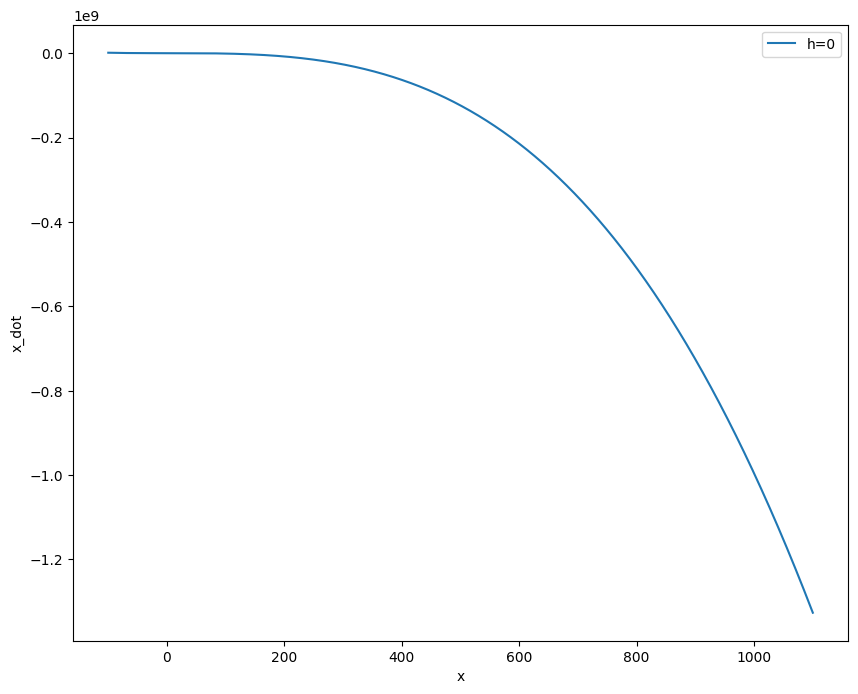

In [40]:
plt.figure(figsize=(10,8))
plt.xlabel('x')
plt.ylabel('x_dot')
plt.plot(x, xd, label='h=0')
plt.legend()
# plt.savefig("q1_1.png")
plt.show()